In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [2]:
# Hides the pink warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
def data_formatter(path_pkl, column, aug_type):
    
    #with open(path, 'rb') as f:
     #   df = pd.read_pickle(f)
     
    pickle_file = open(path_pkl, "rb")
    df = pd.DataFrame(pickle.load(pickle_file))
    pickle_file.close()
    
    if column == 'shifts':
        df['shifts'] = list(range(1,23))
    
    elif column == 'pixels_lost':
        if aug_type == 'Linear':
            df['pixels_lost'] = pd.Series(list(range(1,23))) * 28
        elif aug_type == 'Diagonal' or aug_type == 'Combined':
            df['pixels_lost'] = pd.Series(list(range(1, 23))) * 28 * 2

    elif column == 'percentage_lost':
        if aug_type == 'Linear':
            pixels_lost = pd.Series(list(range(1,23))) * 28
        elif aug_type == 'Diagonal' or aug_type == 'Combined':
            pixels_lost = pd.Series(list(range(1,23))) * 28 * 2
            
        df['percentage_lost'] = round((pixels_lost/784), 3)
        
    df = pd.melt(df, id_vars = [column],
                value_vars = list('12345'),
                value_name = 'accuracy')
    
    df.drop('variable', axis = 1, inplace = True)
    
    df['aug_type'] = [aug_type] * len(df)

    return df

In [7]:
def shifts_visualizer_function(linear_file, diagonal_file, combined_file, column):
    
    linear_data = data_formatter(linear_file, column, 'Linear')
    linear_data_mean = linear_data.groupby(['shifts']).mean().reset_index()
    linear_data_var = linear_data.groupby(['shifts']).var().reset_index()
    
    diagonal_data = data_formatter(diagonal_file, column, 'Diagonal')
    diagonal_data_mean = diagonal_data.groupby(['shifts']).mean().reset_index()
    diagonal_data_var = diagonal_data.groupby(['shifts']).var().reset_index()

    combined_data = data_formatter(combined_file, column, 'Combined')
    combined_data_mean = combined_data.groupby(['shifts']).mean().reset_index()
    combined_data_var = combined_data.groupby(['shifts']).var().reset_index()

    fig = plt.figure(figsize=(20,10))
    fig_1 = fig.add_subplot(211)
    
    fig_1.plot(linear_data_mean['shifts'], linear_data_mean['accuracy'], label = 'Linear Augmentation')
    fig_1.plot(diagonal_data_mean['shifts'], diagonal_data_mean['accuracy'], label = 'Diagonal Augmentation')
    fig_1.plot(combined_data_mean['shifts'], combined_data_mean['accuracy'], label = 'Combined Augmentation')
    plt.title("Mean Accuracy per Shift")
    plt.legend()

    fig_2 = fig.add_subplot(212)
    
    fig_2.plot(linear_data_var['shifts'], linear_data_var['accuracy'], label = 'Linear Augmentation')
    fig_2.plot(diagonal_data_var['shifts'], diagonal_data_var['accuracy'], label = 'Diagonal Augmentation')
    fig_2.plot(combined_data_var['shifts'], combined_data_var['accuracy'], label = 'Combined Augmentation')
    plt.title("Mean Variance Accuracy per Shift")

    plt.legend()
    plt.savefig('results_single/single_visualization.png')
    
    plt.show()

## Le-Net 5 Visualizations

In [8]:
linear_pkl = 'results_single/linear_non_augmented_test/performance_linear_non_augmented_test.pkl'
diagonal_pkl = 'results_single/diagonal_non_augmented_test/performance_diagonal_non_augmented_test.pkl'
combined_pkl = 'results_single/combined_non_augmented_test/performance_combined_non_augmented_test.pkl'

### Shifts

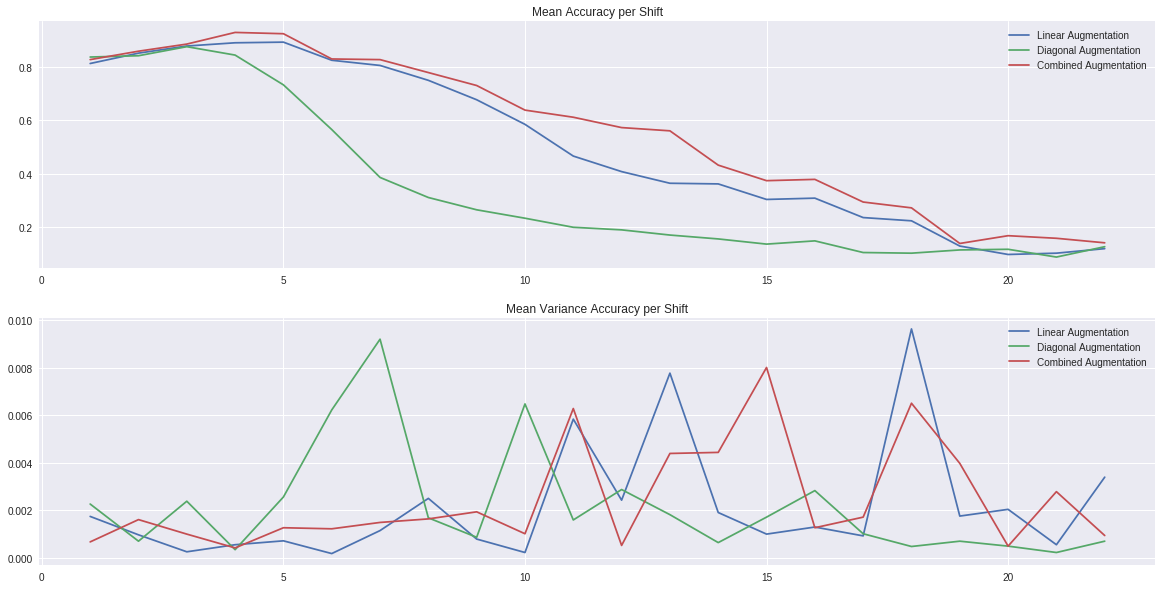

In [9]:
shifts_visualizer_function(linear_pkl, diagonal_pkl, combined_pkl, 'shifts')

### Maximum image pixel loss

### Maximum % of pixels losed

## Support Vector Machine

In [64]:
svm_linear_pkl = 'results/svm_linear_non_augmented_test/svm_performance_linear_non_augmented_test.pkl'
svm_diagonal_pkl = 'results/svm_diagonal_non_augmented_test/svm_performance_diagonal_non_augmented_test.pkl'
svm_combined_pkl = 'results/svm_combined_non_augmented_test/svm_performance_combined_non_augmented_test.pkl'

### Shifts

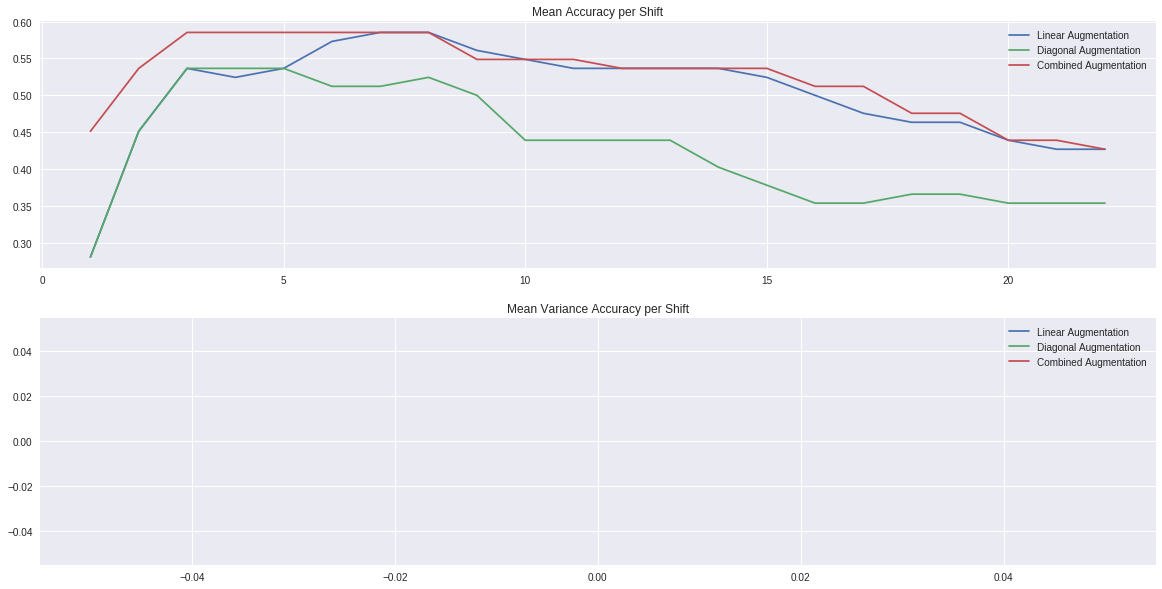

In [68]:
shifts_visualizer_function(svm_linear_pkl, svm_diagonal_pkl, svm_combined_pkl, 'shifts')

### Maximum image pixel loss

### Maximum % of pixels losed